<a href="https://colab.research.google.com/github/min-hee-Lee/python_workdemo/blob/master/p607_%EA%B8%B0%EA%B3%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98%EB%B6%84%EC%84%9D_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 구글 코랩에서 한글 문제 해결  
- 아래 코드 설치를 한다.  
- 코랩 런타임 -> 런타임 다시 시작 한다.

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 22 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,140 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128275 files and di

# 구글 드라이버 연동

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/python/dataanalysis

Mounted at /content/drive
/content/drive/MyDrive/python/dataanalysis


### 오차행렬 = 오분류표=혼동행렬
- 이진 분류에서 성능 지표로 오차행렬(confusion matrix, 혼동 행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고(confused) 있는지도 함께 보여주는 지표이다.


![confusion](https://velog.velcdn.com/images/gangjoo/post/c6d9396b-15b1-4325-b429-50ca9fc3210c/image.png)


- TN는 예측값을 Negative 값 0으로 예측했고 실제값 역시 Negative 값 0
- FP는 예측값을 Positive 값 1로 예측했는데 실제 값은 Negative 값 0
- FN은 예측값을 Negative 값 0으로 예측했는데 실제 값은 Positive 값 1
- TP는 예측값을 Positive갑 1로 예측했는데 실제 값 역시 Positive 값 1

정확도(Accuracy) = 예측  결과와 실제 값이 동일한 건수 / 전체 데이터수 = (TN + TP ) / (TN + FP + FN + TP) 

### Logistic Regression 
- https://aws.amazon.com/ko/what-is/logistic-regression/

###  피마 인디언 당뇨병 예측

#### 1. 데이터 구조
- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값
- Insulin: 혈청 인슐린
- BMI: 체질량지수
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정 값(0,1)

#### 2.  기본 package 설정 및 데이터 불러오기(출처)
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [ ]:
## 1.기본
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# 2. 훈련/검증용 데이터 분리
from sklearn.model_selection import train_test_split

## 3.데이터 전처리
from sklearn.preprocessing import StandardScaler # 연속변수의 표준화

## 5.분류모델구축 
from sklearn.linear_model import LogisticRegression

## 6.모델검정
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics  import classification_report

from sklearn.preprocessing import Binarizer




## 데이터 가져오기
diabetes_data = pd.read_csv('dataset/diabetes/diabetes.csv')


#### 3. 탐색적 데이터 분석 (Exploratory Data Analysis) 

In [ ]:
diabetes_data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [ ]:
diabetes_data.tail(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
diabetes_data.sample(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
221,2,158,90,0,0,31.6,0.805,66,1
238,9,164,84,21,0,30.8,0.831,32,1
464,10,115,98,0,0,24.0,1.022,34,0


In [ ]:
diabetes_data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

- 전체 768개의 데이터 중에서 Negative 값 0이 500개, Positive 값 1이 268개 Negative가 상대적으로 많다.

In [ ]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- 768개의 행, 9개의 열로 이루어져있으며 결측값은 없다.

- 모두 숫자형 변수로 문자형 의미를 가진 변수가 없으므로 인코딩은 필요 없어 보인다.

In [ ]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- 데이터에 min값이 0인 변수가 많다.

- Glucose는 포도당 수치인데 min값이 0이 될 수 없다.

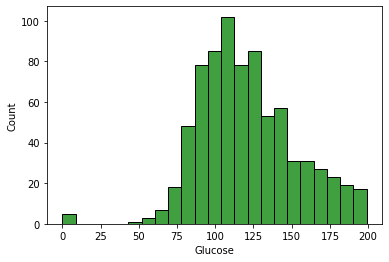

In [ ]:
sns.histplot(data = diabetes_data, x = "Glucose", kde = False, color = "green")
plt.show()

- Glucose 히스토그램을 확인하면 0 값이 일정량 존재하는 것을 알 수 있다.

In [ ]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes_data['Glucose'].count()

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


#### 4. 데이터 분리

In [ ]:
X = diabetes_data.iloc[:,:-1]
y = diabetes_data.Outcome

In [ ]:
frequency = y.value_counts()
label = [f"0: {frequency[0]}개", f"1: {frequency[1]}개"]
print(label)


print(frequency[0]/(frequency[0]+frequency[1]))
print(frequency[1]/(frequency[0]+frequency[1]))

['0: 500개', '1: 268개']
0.6510416666666666
0.3489583333333333


- 전체 768개 데이터 중 Negative가 500개(65.1%), Positive가 268개(34.9%)로 이루어져 있다.

In [ ]:
# 학습/검증 데이터 분리 (데이터 분포에 맞게)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=156, stratify=y)

In [ ]:
frequency = y_train.value_counts()
label = [f"0: {frequency[0]}개", f"1: {frequency[1]}개"]
print(label)

# 비율
print(frequency[0]/(frequency[0]+frequency[1]))
print(frequency[1]/(frequency[0]+frequency[1]))

['0: 400개', '1: 214개']
0.6514657980456026
0.3485342019543974


In [ ]:
frequency = y_test.value_counts()
label = [f"0: {frequency[0]}개", f"1: {frequency[1]}개"]
print(label)

# 비율
print(frequency[0]/(frequency[0]+frequency[1]))
print(frequency[1]/(frequency[0]+frequency[1]))

['0: 100개', '1: 54개']
0.6493506493506493
0.35064935064935066


#### 5 데이터 전처리

In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = X_train[zero_features].mean()

X_train[zero_features] = X_train[zero_features].replace(0, mean_zero_features)

- 0값을 각 변수의 평균값으로 대체 하였다.

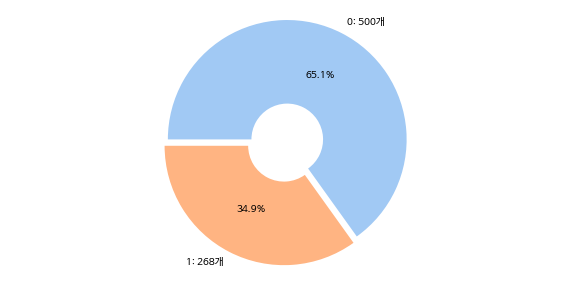

In [ ]:
#colab
plt.rc('font', family='NanumBarunGothic') 

plt.figure(figsize=(10,5))

frequency = diabetes_data['Outcome'].value_counts()
label = [f"0: {frequency[0]}개", f"1: {frequency[1]}개"]

plt.pie(frequency,
    startangle = 180,
    counterclock = False,
    explode = [0.03] * 2,
    autopct = '%1.1f%%',
    labels = label,
    colors = sns.color_palette('pastel', 2),
    wedgeprops = dict(width=0.7)
  )


plt.axis('equal')
plt.show()

- 전체 768개 데이터 중 Negative가 500개(65.1%), Positive가 268개(34.9%)로 이루어져 있다.

- Negative가 많으므로 정확도보다는 재현율에 초점을 맞춘다.

In [ ]:
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

train에전처리 작업에 test에 적용하기 위해 함수로 정의

In [ ]:
def get_process(X_test, y_test):
 # StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
  mean_zero_features = X_test[zero_features].mean()
  X_test[zero_features] = X_test[zero_features].replace(0, mean_zero_features)

  # zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
  scaler = StandardScaler()
  scaler.fit(X_test)
  X_test_scaled = scaler.transform(X_test)

### 6. 로지스틱 회귀로 학습, 예측 및 평가 수행

In [ ]:
lr_clf = LogisticRegression(max_iter=500)

# 학습
lr_clf.fit(X_train , y_train)

# 예측
pred = lr_clf.predict(X_test) #학습시킨 것 테스트
pred_proba = lr_clf.predict_proba(X_test)[:, 1] #확률 이용해 가져옴
print(pred) #학습한 결과 출력
print(y_test) #실제 정답 출력

[0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 1 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0
 1 0 0 0 1 0]
81     0
682    0
169    0
693    1
9      1
      ..
293    1
344    0
650    0
415    1
505    0
Name: Outcome, Length: 154, dtype: int64


In [ ]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
# 평가 수행
get_clf_eval(y_test , pred, pred_proba)

오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111,          F1: 0.6735, AUC:0.8006


In [ ]:
# 분류 레포트로 평가지표 확인
#from sklearn.metrics  import classification_report

# 내부적으로 confusion matrix을 만든 후 평가 지표별로 점수를 계산해 준다.
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       100
           1       0.75      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



supoort
- 각 라벨의 실제 샘플 개수이다.
- 예시로 총 179의 샘플 중 라벨이 0인 샘플은 118개이고 라벨이 1인 샘플은 61개  있다.

macro avg 
- 평균에 평균을 내는 개념. 단순 평균.
- 각 클래스 별로 동일한 가중치를 부여한다. 즉 샘플 개수의 불균형을 고려하지 않는다
- f1-macro-avg를 예로 들면 0부터 1까지 라벨의 f1-score 2개를 모두 더한 뒤 2을 나누면 된다.
- 샘플 개수의 불균형을 고려하지 않기 때문에 소수 클래스에 대한 성능이 낮을 때 더 큰 페널티가 발생한다. (데이터가 불균형할 때 확인해보자)


weighted avg
- 각 클래스에 속하는 표본의 개수로 가중 평균을 내서 계산하는 방법.
- 샘플 개수의 불균형을 고려한다.
- weighted avg f1 score를 예로 들면 아래와 같다.  
 F1_class0  * W1 + F1_class1 * W2  
- 클래스 0의 경우 전체 179에 대한 118의 비율을 f1-score에 곱하면 된다.
- 가중 평균을 수행하기 때문에 샘플의 개수가 적은 클래스의 영향력이 감소한다.

>macro precision avg = (0.81+0.75)/2  = 0.78  
>weighted precision avg = 0.81 * (100/154) + 0.75 * 541/154) = 0.79    

>macro recall avg =  (0.89+0.61)/2  = 0.85  
>weighted recall avg = 0.89 * (100/154) + 0.61 * (54/154) = 0.79      


>macro f1-score avg = (0.85+0.67)/2  = 0.76  
>weighted f1-score avg = 0.85 * (100/154) + 0.67 * (54/154) = 0.79    

In [ ]:
import numpy as np
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_po):
    # precision_recall_curve(실제 y, Positve로 예측할 확률)
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_po)

    # plot
    # y축인 precisions와 recalls의 갯수 = threshold 갯수 + 1 이어서 x,y 갯수를 동일하게 맞춰줌
    thres_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thres_boundary], "r", label="precision")
    plt.plot(thresholds, recalls[:thres_boundary], label="recall")
    
    # x축 스케일 0.1 단위로 조정
    start, end = plt.xlim()
    plt.xticks( np.round( np.arange(start, end, 0.1), 2))

    # 라벨링
    plt.xlabel("Threshold value"), plt.ylabel("Precision and Recall value")
    plt.legend()

    plt.show()

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


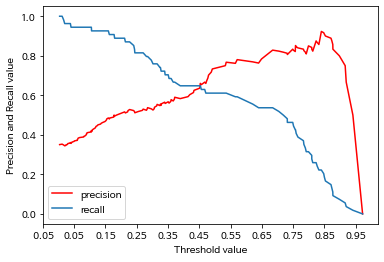

In [ ]:
# Positive 확률
lr_pred_proba_po = lr_clf.predict_proba(X_test)[:,1].reshape(-1,1)

precision_recall_curve_plot(y_test, lr_pred_proba_po)

In [ ]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteration하면서 Evaluation 수행.
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)

In [ ]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[63 37]
 [13 41]]
정확도: 0.6753, 정밀도: 0.5256, 재현율: 0.7593,          F1: 0.6212, AUC:0.8006
임곗값: 0.33
오차 행렬
[[70 30]
 [15 39]]
정확도: 0.7078, 정밀도: 0.5652, 재현율: 0.7222,          F1: 0.6341, AUC:0.8006
임곗값: 0.36
오차 행렬
[[73 27]
 [18 36]]
정확도: 0.7078, 정밀도: 0.5714, 재현율: 0.6667,          F1: 0.6154, AUC:0.8006
임곗값: 0.39
오차 행렬
[[76 24]
 [19 35]]
정확도: 0.7208, 정밀도: 0.5932, 재현율: 0.6481,          F1: 0.6195, AUC:0.8006
임곗값: 0.42
오차 행렬
[[78 22]
 [19 35]]
정확도: 0.7338, 정밀도: 0.6140, 재현율: 0.6481,          F1: 0.6306, AUC:0.8006
임곗값: 0.45
오차 행렬
[[80 20]
 [19 35]]
정확도: 0.7468, 정밀도: 0.6364, 재현율: 0.6481,          F1: 0.6422, AUC:0.8006
임곗값: 0.48
오차 행렬
[[87 13]
 [21 33]]
정확도: 0.7792, 정밀도: 0.7174, 재현율: 0.6111,          F1: 0.6600, AUC:0.8006
임곗값: 0.5
오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500, 재현율: 0.6111,          F1: 0.6735, AUC:0.8006


- 재현율을 높이는데 초점을 둔다면 threshod는 0.3일때 가장 좋아보이나 정밀도가 매우 낮아진다.

- threshold가 0.48이 전체적인 성능 평가 지표를 유지하면서 재현율을 약간 높이므로 좋은 임계값으로 보인다.

In [ ]:
# 임곗값를 0.48로 설정한 Binarizer 생성
binarizer = Binarizer(threshold=0.48)

# 위에서 구한 lr_clf의 predict_proba() 예측 확률 array에서 1에 해당하는 컬럼값을 Binarizer변환. 
pred_th_048 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1)) 

get_clf_eval(y_test , pred_th_048, pred_proba[:, 1])

오차 행렬
[[87 13]
 [21 33]]
정확도: 0.7792, 정밀도: 0.7174, 재현율: 0.6111,          F1: 0.6600, AUC:0.8006


- threshold가 0.48일때 오차행렬 및 앞서 구한 성능 평가 지표이다.

=========================================================================================================